# Exploring results (FA maps) - just age and gender

In [1]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
import pandas as pd
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
paramtype = 'FA'
analysis_name='dm_%s_justage'%paramtype
analysis_wd = osp.join('/home/grg/spm/analysis_20170116/', analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_mask.nii'
excel_fp = '/home/grg/spm/designmat/%s.xls'%analysis_name
print 'Found SPM files:', spm

Found SPM files: ['/home/grg/spm/analysis_20170116/dm_FA_justage/estimatecontrasts/SPM.mat']


In [4]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/spm/designmat/dm_FA_justage.xls looking up column FA ...
Analysis name: dm_FA_justage
First column: FA
Columns in the model: [u'Apoe2-3', u'Apoe2-4', u'Apoe3-3', u'Apoe3-4', u'Apoe4-4', u'age', u'gender']
### Justage model identified ###
Analysis name: dm_FA_justage
Scans (514): [u'/home/grg/spm/FA/10070_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10102_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10108_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10235_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10365_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10419_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10463_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10530_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10551_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10563_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10576_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10630_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10668_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10692_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10693_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10703_F

,contrast name,contrast type,covariate names,covariate weights
0,Effect Age,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
1,Effect Gender,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"


/home/grg/spm/analysis_20170116/dm_FA_justage/estimatecontrasts/spmT_0001.nii
/home/grg/spm/analysis_20170116/dm_FA_justage/estimatecontrasts/spmT_0002.nii


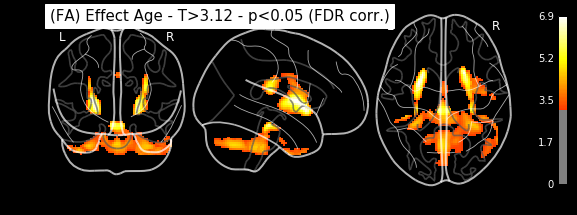

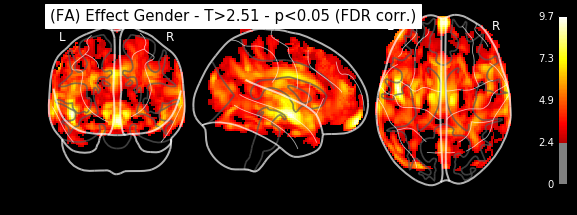

In [16]:
spm_mat_file = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))[0]
for i in range(1, 3):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.05, cluster_threshold=10, height_control='fdr')
    plotting.plot_glass_brain(thresholded_map1,
                      title='(%s) %s - T>%.02f - p<0.05 (FDR corr.)'%(paramtype, contrast_name, threshold1), colorbar=True,
                      black_bg=True, display_mode='ortho', threshold=threshold1)  
plotting.show()

/home/grg/spm/analysis_20170116/dm_FA_justage/estimatecontrasts/spmT_0001.nii
Saving to... /tmp/tmpx1tyx9.png
/home/grg/spm/analysis_20170116/dm_FA_justage/estimatecontrasts/spmT_0002.nii
Saving to... /tmp/tmpq58Tqk.png


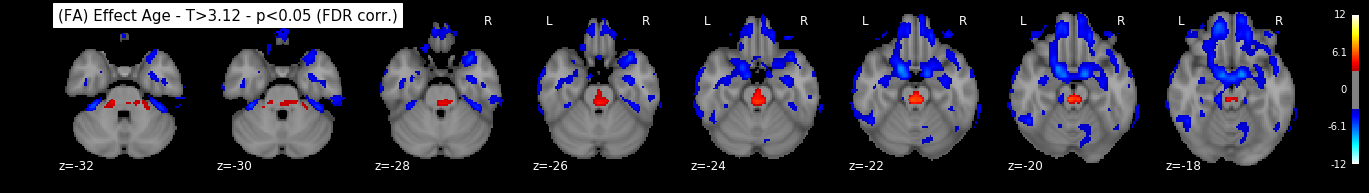

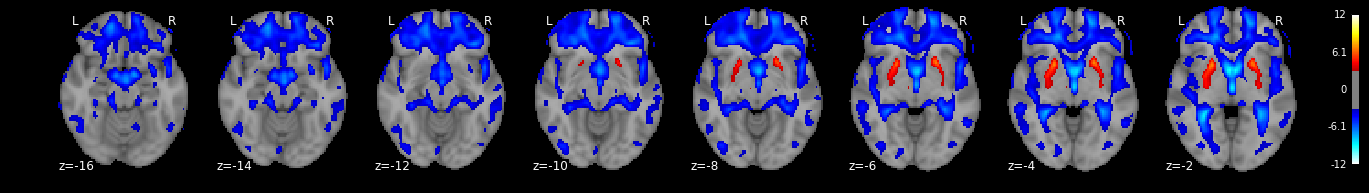

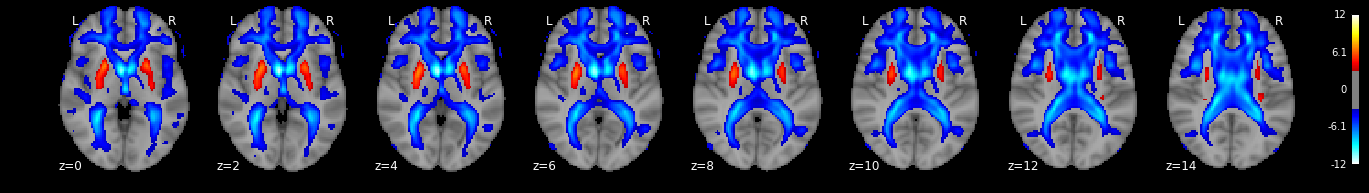

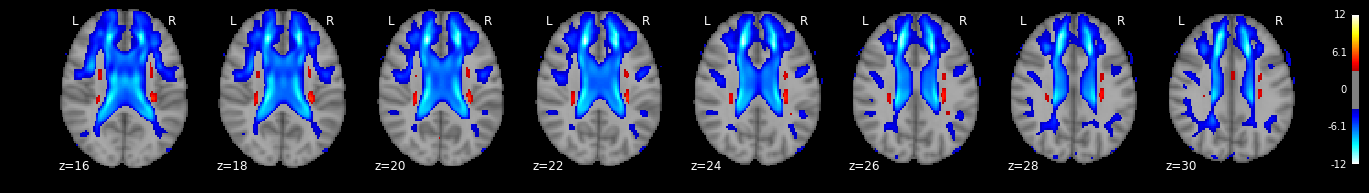

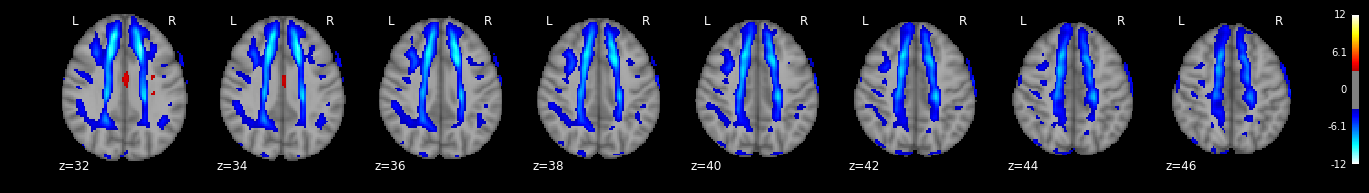

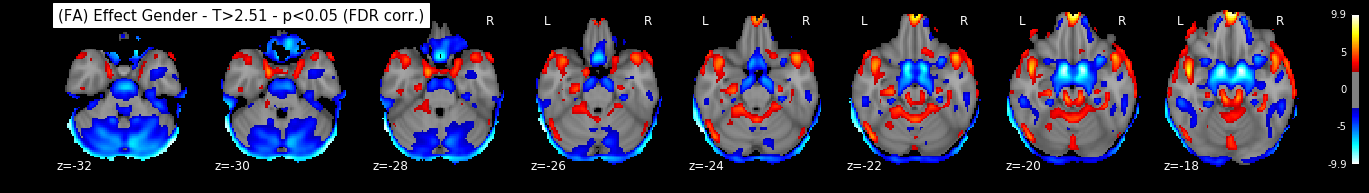

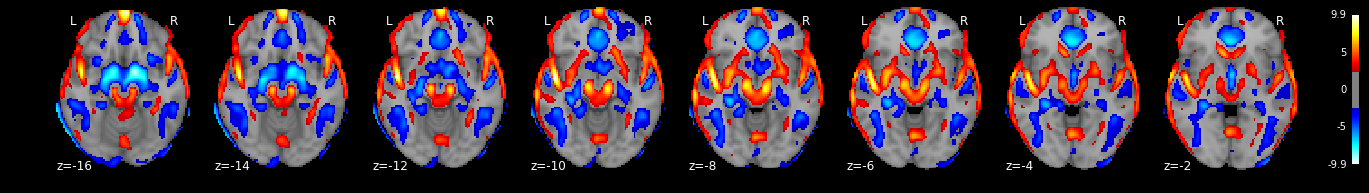

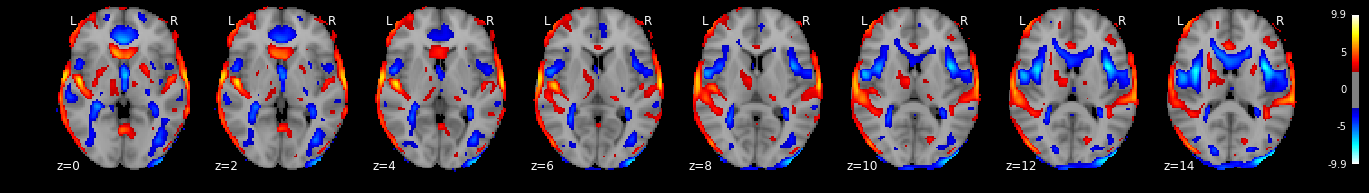

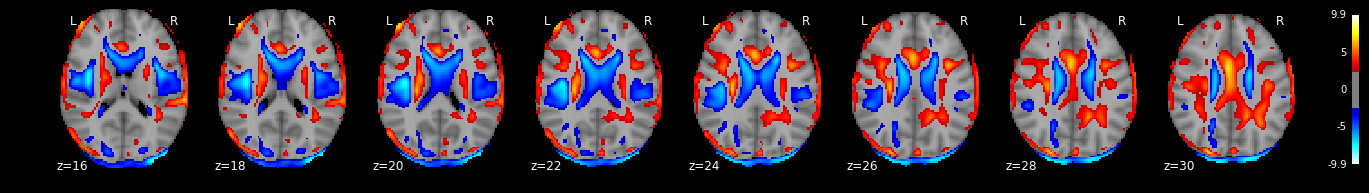

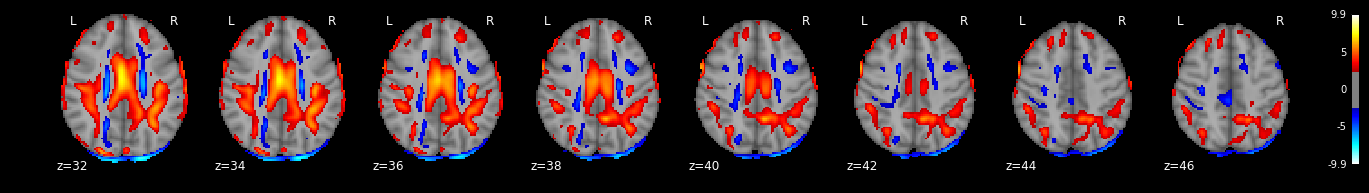

In [20]:
for i in range(1, 3):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.05, cluster_threshold=10, height_control='fdr')

    plot_stat_map(img, threshold=threshold1, row_l=8, start=-32, end=34, step=2,
                  title= '(%s) %s - T>%.02f - p<0.05 (FDR corr.)'%(paramtype, contrast_name, threshold1))
        
plotting.show()